## Quantitative Performance Test (Computational Time) of SUMMA Simulation and Reproducibility of Figure 9 of Clark et al., (2015b) in Binder

#### Young-Don Choi<sup>a</sup>, Jonathan L. Goodall<sup>a</sup>, Jared Nguyen<sup>b</sup>, Raza Ahmad<sup>c</sup>, Tanu Malik<sup>c</sup>, Zhiyu Li<sup>d</sup>, Anthony M. Castronova<sup>e</sup>, Shaowen Wang<sup>d</sup>,  David G. Tarboton<sup>f</sup>

<sup>a</sup>Department of Engineering Systems & Environment, University of Virginia, Charlottesville, VA, USA (yc5ef@virginia.edu, goodall@virginia.edu, jtn2km@virginia.edu)
<sup>b</sup>Department of Computer Science, University of Virginia, Charlottesville, Virginia, USA
<sup>c</sup>School of Computing, DePaul University, Chicago, IL, USA (raza.ahmad@depaul.edu, tmalik1@depaul.edu)
<sup>d</sup>Department of Geography & Geographic Information Science, University of Illinois at Urbana-Champaign, IL, USA
<sup>e</sup>Consortium of Universities for the Advancement of Hydrological Science, Inc, 150 Cambridge Park Drive, Cambridge, MA 02140, USA (acastronova@cuahsi.org)
<sup>f</sup>Department of Civil and Environmental Engineering, Utah Water Research Laboratory, Utah State University, Logan, Utah, USA (dtarb@usu.edu)

# 1. Introduction

## 1.1 Research Abstract

There are a growing number of approaches for overcoming the reproducibility crisis facing computational science fields. The objective of this research is to compare eleven of these approaches and suggest best practices and guidance for which approach is most appropriate to achieve modeling objectives, specifically for simulating hydrologic and environmental systems. We first present the eleven approaches that each use a different combination of software tools for achieving reproducibility. We then measure quantitative performance (complexity, size of reproducible artifacts, and computational time) and qualitative performance using the SUMMA hydrologic model as a use case study for testing each approach. Based on the results, we recommend reproducible approaches best suited for achieving different modeling objectives. These recommendations aim to guide modelers in their efforts to create and share computational artifacts in a reproducible manner, depending on their research needs and purposes.

## 1.2 MyBinder

MyBinder is an online service for building and sharing reproducible and interactive computational environments from online repositories. Under the hood, it is a federation of BinderHub deployments that are maintained by the Binder community. It serves as both a public service and a demonstration of the BinderHub technology, though it is by no means the only BinderHub in existence. If you’re interested in deploying your own BinderHub for your own uses, please see the BinderHub documentation and don’t hesitate to reach out to the Binder community.

# 2. Application

## 2.1 Study Area

We used a case study of Clark et al. (2015b) which describes a set of modeling experiments exploring various hydrologic modeling scenarios using SUMMA. The study area for these modeling experiments is the Reynolds Mountain East Area (A=32.7km2) in the Reynolds Creek Experimental Watershed in Idaho, USA

Here is the link of Clark et al. (2015b)(SUMMA 2nd Paper): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR017200

<img src="study_area.jpg" width="1000">

Figure 1. Reynolds Mountain East Area in the Reynolds Creek Experimental Watershed

## 2.2 Example Application: A Hydrologic Model Software (SUMMA:The Structure for Unifying Multiple Modeling Alternative) and Python model API (pySUMMA)

The Structure for Unifying Multiple Modeling Alternative (SUMMA) was developed to enable the controlled and systematic evaluation of multiple model representations of hydrologic processes and scaling behavior (Clark et al., 2015a).  SUMMA has several beneficial capabilities that assist with a unifying framework. These include 1) the theoretical range of the SUMMA model, 2) the flexible hierarchical spatial structure, and 3) the application of different physical processes.

<img src="summa.png" width="600">

Figure 2. Conceptual diagram to illustrate the SUMMA framework to describe the application of multiple process parameterizations with conservation equations and a numerical solver

## 2.3 Setting of Simulation Scenarios and Performance Test

### 2.3.1 SUMMA Case Studies for Performance Test

In this study, we simulate 2 cases studies for performance test in Local Computer and reproduce Figure 9 from the cases studies. 

### (Scenario - 3) A Single Simulatioin
 - An applied Parameterization: 1d Richard
 
 - Simulation Periods: 2002-07-01~2008-9-30 (75 months)

### (Scenario - 4) Ensemble Simulations (3 simulations)

 - Applied Three Parameterization: 1d Richards, Lumped Topmodel, and Distributed Topmodel
  
 - Simulation Periods: 2002-07-01~2008-9-30 (75 months)

### 2.3.2 Quantitative Measurement: Computional Time

 **- Measurement: Wall time**
  - (Wall time): The actual time spent in running the process from start to finish

# 3. Software and Data Availability

* Software
  - SUMMA 3.0.3 (https://github.com/NCAR/summa/releases/tag/v3.0.3)
  - pySUMMA 3.0.3 (https://github.com/UW-Hydro/pysumma/releases/tag/v3.0.3)
  
* Dataset in HydroShare
  - (Model input) https://www.hydroshare.org/resource/eefc8724d589425a84ba206f55928735/

# 4. Download SUMMA Model Instance from HydroShare

* First, you need to check and set the Jupyter kernel as <font color='red'>"Python 3"</font> for this notebook. Then for downloading the SUMMA model instance, you have to fill in <font color='red'>HydroShare ID and P/W </font>at the cell below. If you don't have HydroShare account, you can sign up at HydroShare (https://www.hydroshare.org/)

In [1]:
from pysumma import hydroshare_utils
import os

In [2]:
from pysumma import hydroshare_utils
import os
resource_id = 'eefc8724d589425a84ba206f55928735'
instance = hydroshare_utils.get_hs_resource(resource_id, os.getcwd())

Username:  choi
Password for choi:  ········


* Set user defined directory in filemanger file which control the location of every configuration files for SUMMA

In [3]:
!cd {instance}/; chmod +x ./installTestCases_local.sh
!cd {instance}/; ./installTestCases_local.sh

TestCases installed


# 5. A Single SUMMA Run

## 5.1 Configuration Setting

### 5.1.1 Review a File Manager file

In [6]:
import pysumma as ps
import os
instance = "SummaModel_Reynolds_Runoff"
executable = os.getcwd()+"/summa/bin/summa.exe"
# path to the SUMMA filemanager file
file_manager = os.path.join(os.getcwd(), instance, 'settings/summa_fileManager_1dRichards.txt')
# create a pySUMMA simulation object using the SUMMA 'file manager' input file 
S_1dRichards = ps.Simulation(executable, file_manager)

In [7]:
# Print filamager
print(S_1dRichards.manager)

controlVersion                       'SUMMA_FILE_MANAGER_V3.0.0'
simStartTime                         '2002-07-01 00:00'
simEndTime                           '2008-09-30 00:00'
tmZoneInfo                           'localTime'
settingsPath                         '/home/jovyan/SummaModel_Reynolds_Runoff/settings/'
forcingPath                          '/home/jovyan/SummaModel_Reynolds_Runoff/data/forcingData/'
outputPath                           '/home/jovyan/SummaModel_Reynolds_Runoff/output/'
decisionsFile                        'summa_zDecisions_1dRichards.txt'
outputControlFile                    'meta/Model_Output.txt'
globalHruParamFile                   'summa_zLocalParamInfo-2mRoots.txt'
globalGruParamFile                   'summa_zBasinParamInfo.txt'
attributeFile                        'summa_zLocalAttributes_riparianAspen.nc'
trialParamFile                       'summa_zParamTrial_1dRichards.nc'
forcingListFile                      'summa_zForcingFileList_riparianAspen_1dRich

In [8]:
# Print Decision files
print(S_1dRichards.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    BallBerry            ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

## 5.2 Check the Current Status of a Local Computer

### 5.2.1 Check CPU inforamtion

In [9]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 60
model name	: Intel Core Processor (Haswell, no TSX)
stepping	: 1
microcode	: 0x1
cpu MHz		: 2992.966
cache size	: 16384 KB
physical id	: 0
siblings	: 1
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 syscall nx rdtscp lm constant_tsc rep_good nopl xtopology cpuid tsc_known_freq pni pclmulqdq vmx ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand hypervisor lahf_lm abm cpuid_fault invpcid_single pti tpr_shadow vnmi flexpriority ept vpid fsgsbase bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit srbds
bogomips	: 5985.93
clflush size	: 64
cache_alignment	: 64
address sizes	: 40 bits physical, 48 bits virtual
p

### 5.2.2 Check the number of CPUs

In [10]:
!nproc --all

8


## 5.3 Performance Test

### 5.3.1 Computional Time using Wall Time

In [11]:
%%time
S_1dRichards.run('local', run_suffix='_single_time')
results_1dRichards_ncfile = S_1dRichards.get_output_files()

CPU times: user 201 ms, sys: 31.4 ms, total: 232 ms
Wall time: 52.1 s


## 5.4 Visualization of a Single SUMMA output

### 5.4.1 Plot Runoff from SUMMA Output and Observation

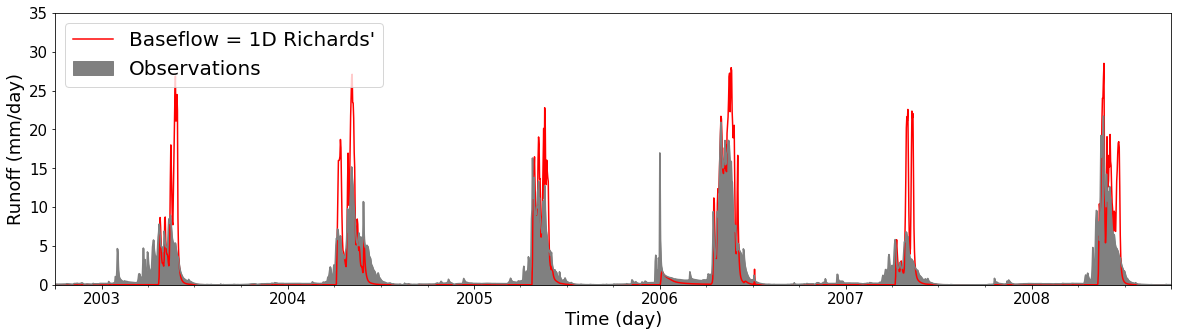

In [12]:
from pysumma.plotting.plotting import Plotting
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

def calc_total_runoff(runoff_output_df):
    # average Instance Runoff variable is runoff
    runoff = runoff_output_df['averageInstantRunoff']
    dates = runoff.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = runoff.data*86400000
    # create two dimensional tabular data structure 
    total_runoff_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_runoff_df.index = total_runoff_df.index.round("D")
    # set the time period to display plot 
    total_runoff_df = total_runoff_df.loc["2002-10-01":"2008-09-30"]
    # resample data by the average value hourly
    total_runoff_by_daily = total_runoff_df.resample("D").mean()
    return total_runoff_by_daily

# get daily runoff output using distributed Topmodel method (distributed Topmodel method appied 1 hru)
results_1dRichards = xr.open_dataset(results_1dRichards_ncfile[0])
daily_1dRichards = calc_total_runoff(results_1dRichards)

# Combine the different lateral flux parameterizations on simulations of runoff
Runoff_Combine = pd.concat([daily_1dRichards], axis=1)
# add label 
Runoff_Combine.columns = ["Baseflow = 1D Richards'"]

# create pySUMMA Plotting Object
Val_Streamflow = Plotting(os.getcwd() +'/' + instance + '/data/validationData/ReynoldsCreek_valData.nc')

# read Runoff data(Q) from validation netcdf file
obs_streamflow = Val_Streamflow.ds['Q']
# create dates(X-axis) attribute from validation netcdf file
dates = obs_streamflow.coords['time'].data
# Change unit from cm/hr to mm/day
data_values = obs_streamflow.data*24*10
# create two dimensional tabular data structure 
df = pd.DataFrame(data_values, index=dates)
# set the time period to display plot
df_filt = df.loc["2002-10-01":"2008-09-30"]
# select label
df_filt.columns = ['Observations']
# resample data by the average daily from hourly 
obs_streamflow_daily = df_filt.resample("D").mean()
# set x index accoording to the change of time step
obs_date = obs_streamflow_daily.index

graph_runoff = pd.concat([Runoff_Combine, obs_streamflow_daily], 1)

fig = plt.figure(figsize=(20,5))
graph_runoff["Baseflow = 1D Richards'"].plot(color='r') 
graph_runoff["Observations"].plot.area(color='grey', label="Observations") 

plt.tick_params(labelsize = 15)

plt.xlabel("Time (day)", fontsize=18)
plt.ylabel("Runoff (mm/day)", fontsize=18)
plt.ylim(0,35)
plt.legend(fontsize=20, loc=2)

# 6. Ensemble SUMMA Runs

## 6.1 Configuration Setting

### 6.1.1 Set different lateral flow parameterizations

In [13]:
import pysumma as ps
executable = os.getcwd()+"/summa/bin/summa.exe"

In [14]:
config = {'++file_manager_1dRichards++': {'file_manager': '/home/jovyan/SummaModel_Reynolds_Runoff/settings/summa_fileManager_1dRichards.txt'},
          '++file_manager_lumpedTopmodel++': {'file_manager': '/home/jovyan/SummaModel_Reynolds_Runoff/settings/summa_fileManager_lumpedTopmodel.txt'},
          '++file_manager_distributedTopmodel++': {'file_manager': '/home/jovyan/SummaModel_Reynolds_Runoff/settings/summa_fileManager_distributedTopmodel.txt'}}

In [15]:
total_ens = ps.Ensemble(executable, config, num_workers=3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/deploy/spec.py:284: UserWarning: 
Could not launch service 'dashboard' on port 8787. Got the following message:

failed to validate _ServerOpts(...).prefix: expected a value of type str, got None of type NoneType
  self.scheduler = await self.scheduler


## 6.2 Performance Test

### 6.2.1 Computional Time: Wall Time

In [16]:
%%time
total_ens.run('local')

CPU times: user 6.95 s, sys: 1.1 s, total: 8.05 s
Wall time: 4min 33s


## 6.3 Visualization of Ensemble SUMMA outputs

### 6.3.1 Check the list of Ensemble SUMMA outputs

In [17]:
out_file_paths = [s.get_output_files() for s in total_ens.simulations.values()]
out_file_paths

[['/home/jovyan/SummaModel_Reynolds_Runoff/output/basinRunoff_++file_manager_1dRichards++_timestep.nc'],
 ['/home/jovyan/SummaModel_Reynolds_Runoff/output/basinRunoff_++file_manager_lumpedTopmodel++_timestep.nc'],
 ['/home/jovyan/SummaModel_Reynolds_Runoff/output/basinRunoff_++file_manager_distributedTopmodel++_timestep.nc']]

## 4. Results

### Recreate the Figure 9 plot from Clark et al., 2015: The Basin-Wide Runoff for the model representation of the lateral flux of liquid water

In [18]:
from pysumma.plotting.plotting import Plotting
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

### 1) Create function to calculate daily runoff from SUMMA output for the period 1 oct 2002 to 1 oct 2008

In [19]:
def calc_total_runoff(runoff_output_df):
    # average Instance Runoff variable is runoff
    runoff = runoff_output_df['averageInstantRunoff']
    dates = runoff.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = runoff.data*86400000
    # create two dimensional tabular data structure 
    total_runoff_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_runoff_df.index = total_runoff_df.index.round("D")
    # set the time period to display plot 
    total_runoff_df = total_runoff_df.loc["2002-10-01":"2008-09-30"]
    # resample data by the average value hourly
    total_runoff_by_daily = total_runoff_df.resample("D").mean()
    return total_runoff_by_daily

### 2) Get daily runoff

In [20]:
# get daily runoff output using 1d Richards method(1d Richards method appied 1 hru)
results_1dRichards = xr.open_dataset(out_file_paths[0][0])
daily_1dRichards = calc_total_runoff(results_1dRichards)
# get daily runoff output using lumped Topmodel method (lumped Topmodel method appied 1 hru)
results_lumpedTopmodel = xr.open_dataset(out_file_paths[1][0])
daily_lumpedTopmodel = calc_total_runoff(results_lumpedTopmodel)
# get daily runoff output using distributed Topmodel method (distributed Topmodel method appied 1 hru)
results_distributedTopmodel = xr.open_dataset(out_file_paths[2][0])
daily_distributedTopmodel = calc_total_runoff(results_distributedTopmodel)

### 3) Combine the different lateral flux parameterizations on simulations of runoff into a single Pandas Dataframe

In [21]:
# Combine the different lateral flux parameterizations on simulations of runoff
Runoff_Combine = pd.concat([daily_1dRichards, daily_lumpedTopmodel, daily_distributedTopmodel], axis=1)
# add label 
Runoff_Combine.columns = ["Baseflow = 1D Richards'", 'Baseflow = Topmodel(lumped)', 'Baseflow = Topmodel(distributed)']

In [22]:
Runoff_Combine.head()

,Baseflow = 1D Richards',Baseflow = Topmodel(lumped),Baseflow = Topmodel(distributed)
2002-10-01,0.000072,0.0,0.0
2002-10-02,0.000072,0.0,0.0
2002-10-03,0.000072,0.0,0.0
2002-10-04,0.000072,0.0,0.0
2002-10-05,0.000072,0.0,0.0


### 4) Add obervation data from streamflow station and Reynolds Mountain East to the plot

In [23]:
# create pySUMMA Plotting Object
import os
instance = "SummaModel_Reynolds_Runoff"
Val_Streamflow = Plotting(os.getcwd() +'/' + instance + '/data/validationData/ReynoldsCreek_valData.nc')

In [24]:
# read Runoff data(Q) from validation netcdf file
obs_streamflow = Val_Streamflow.ds['Q']
# create dates(X-axis) attribute from validation netcdf file
dates = obs_streamflow.coords['time'].data
# Change unit from cm/hr to mm/day
data_values = obs_streamflow.data*24*10
# create two dimensional tabular data structure 
df = pd.DataFrame(data_values, index=dates)
# set the time period to display plot
df_filt = df.loc["2002-10-01":"2008-09-30"]
# select label
df_filt.columns = ['Observations']
# resample data by the average daily from hourly 
obs_streamflow_daily = df_filt.resample("D").mean()
# set x index accoording to the change of time step
obs_date = obs_streamflow_daily.index

### 5) Plotting output of the Parameterization of the Lateral Flux of Liquid Water and observation data

In [25]:
graph_runoff = pd.concat([Runoff_Combine, obs_streamflow_daily], 1)

In [26]:
graph_runoff.head()

,Baseflow = 1D Richards',Baseflow = Topmodel(lumped),Baseflow = Topmodel(distributed),Observations
2002-10-01,0.000072,0.0,0.0,0.06957
2002-10-02,0.000072,0.0,0.0,0.06950
2002-10-03,0.000072,0.0,0.0,0.07983
2002-10-04,0.000072,0.0,0.0,0.09851
2002-10-05,0.000072,0.0,0.0,0.08417


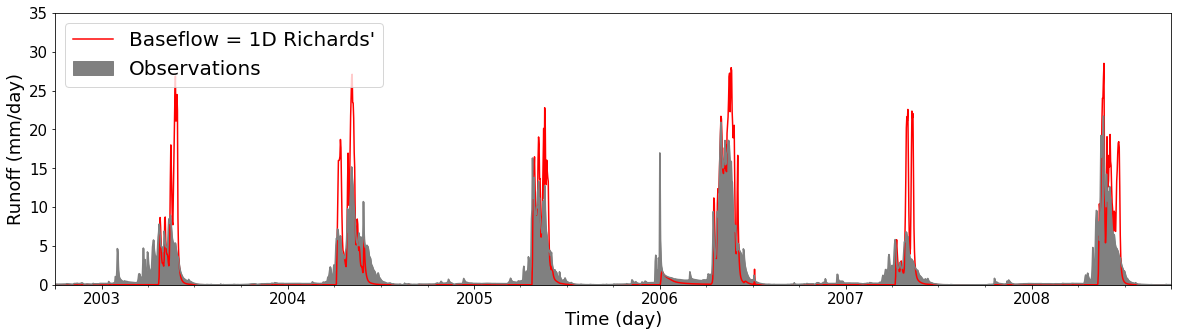

In [27]:
fig = plt.figure(figsize=(20,5))
graph_runoff["Baseflow = 1D Richards'"].plot(color='r') 
graph_runoff["Observations"].plot.area(color='grey', label="Observations") 

plt.tick_params(labelsize = 15)

plt.xlabel("Time (day)", fontsize=18)
plt.ylabel("Runoff (mm/day)", fontsize=18)
plt.ylim(0,35)
plt.legend(fontsize=20, loc=2)

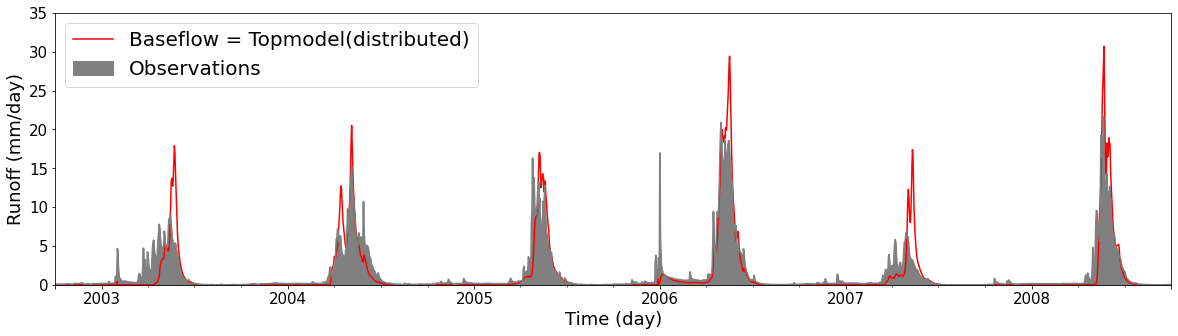

In [28]:
fig = plt.figure(figsize=(20,5))
graph_runoff["Baseflow = Topmodel(distributed)"].plot(color='r') 
graph_runoff["Observations"].plot.area(color='grey', label="Observations") 

plt.tick_params(labelsize = 15)

plt.xlabel("Time (day)", fontsize=18)
plt.ylabel("Runoff (mm/day)", fontsize=18)
plt.ylim(0,35)
plt.legend(fontsize=20, loc=2)

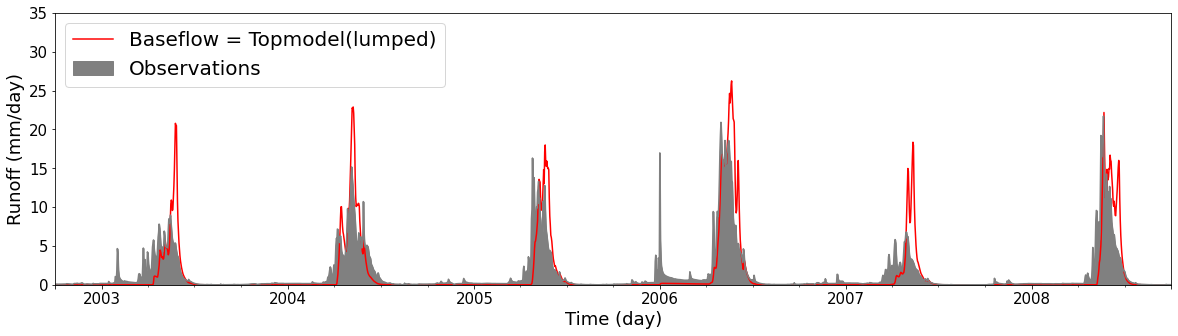

In [29]:
fig = plt.figure(figsize=(20,5))
graph_runoff["Baseflow = Topmodel(lumped)"].plot(color='r') 
graph_runoff["Observations"].plot.area(color='grey', label="Observations") 

plt.tick_params(labelsize = 15)

plt.xlabel("Time (day)", fontsize=18)
plt.ylabel("Runoff (mm/day)", fontsize=18)
plt.ylim(0,35)
plt.legend(fontsize=20, loc=2)